### This is the undirected network of common noun and adjective adjacencies for the novel David Copperfield by English 19th century writer Charles Dickens. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pathlib import Path # do pracy z plikami


In [4]:
NODES_PATH = Path('nodes_names.txt').resolve()
EDGES_PATH = Path('edges.txt').resolve()

In [5]:
with open(NODES_PATH, 'r') as f:
    nodes_list = f.read().splitlines()

with open(EDGES_PATH, 'r') as f:
    rows = f.read().splitlines()
# jedna krawedz ma wygladac tak (N1,N2)
edges = []
for row in rows:
    e = row.split(' ')
    edge1 = int(e[0])
    edge2 = int(e[1])
    edges.append((edge1, edge2))

len(nodes_list) 
max_num_in_edges = max([max(e) for e in edges])
max_num_in_edges == len(nodes_list) # zwroci false jak istnieja polaczenia miedzy nieistniejacymi wierzcholkami

True

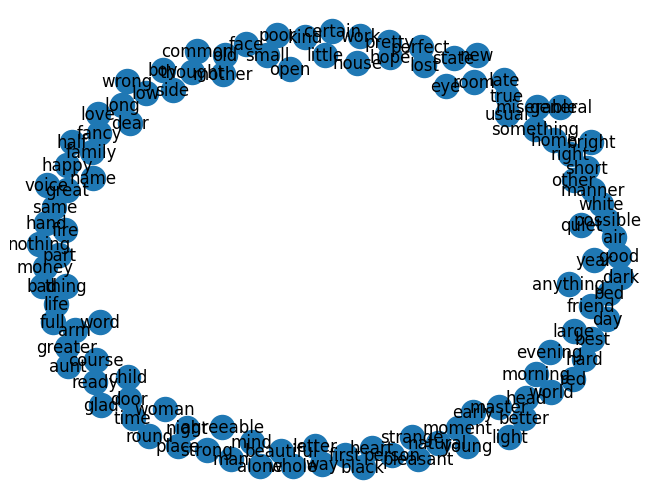

In [6]:
G = nx.Graph() # undirected graph
for i, node in enumerate(nodes_list): # w edges.txt numery ida od jedynki
    G.add_node(i+1, label=node)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

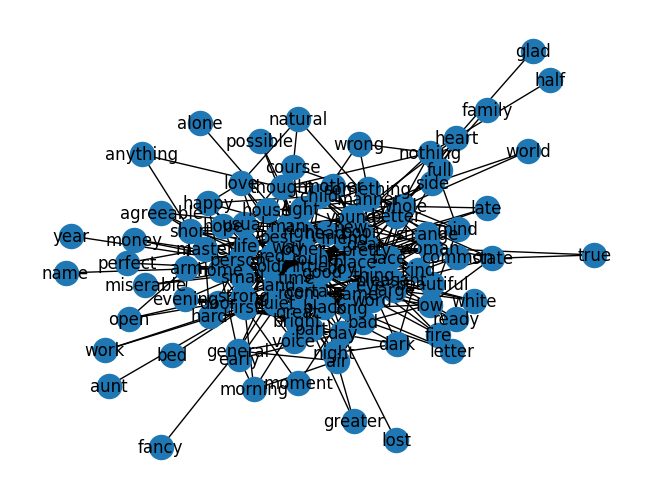

In [7]:
G.add_edges_from(edges)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

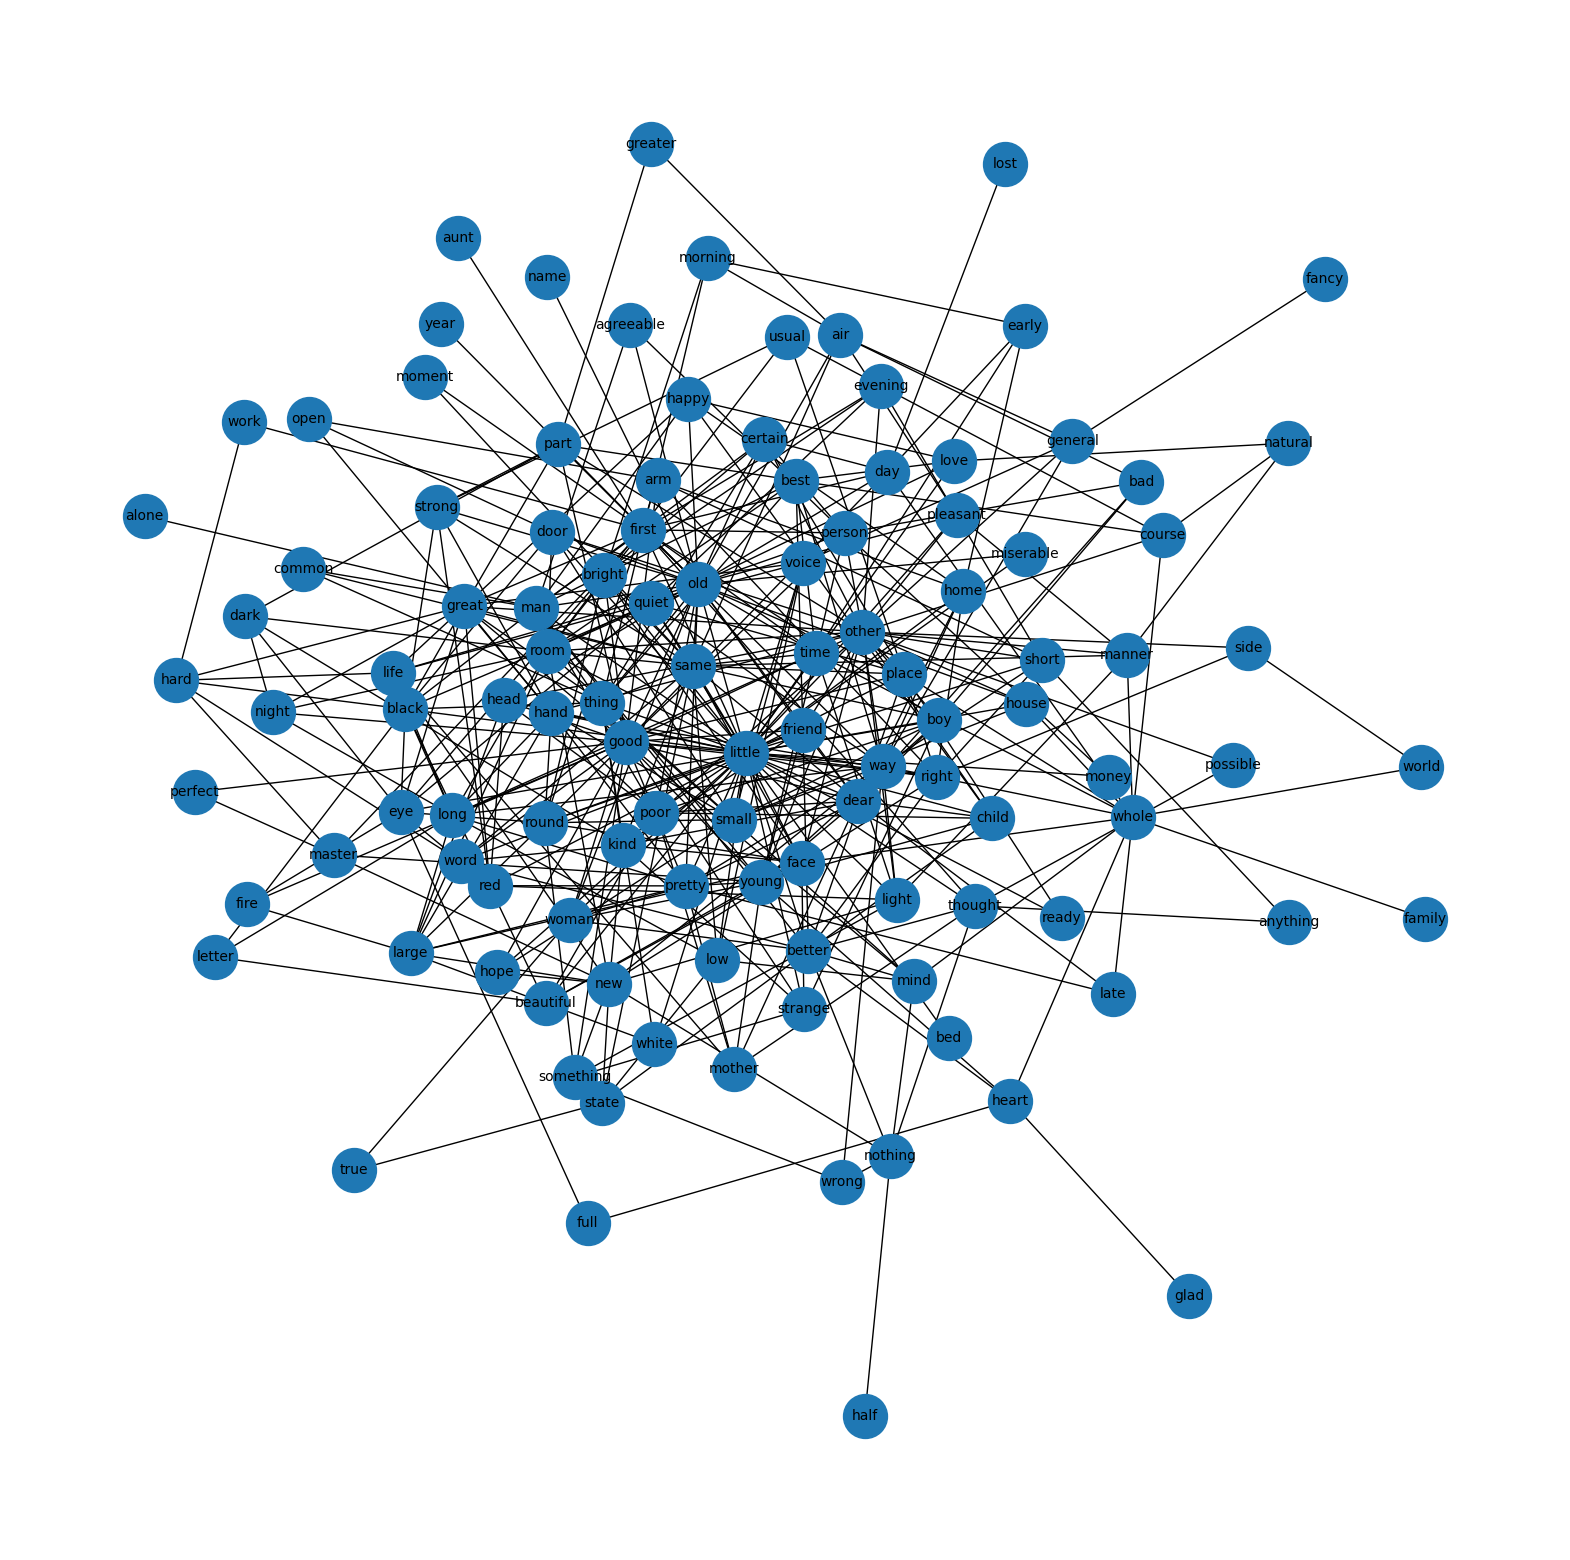

In [8]:
# https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
#pos = nx.layo
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'), ax=ax, pos = pos, node_size=1000, font_size=10)

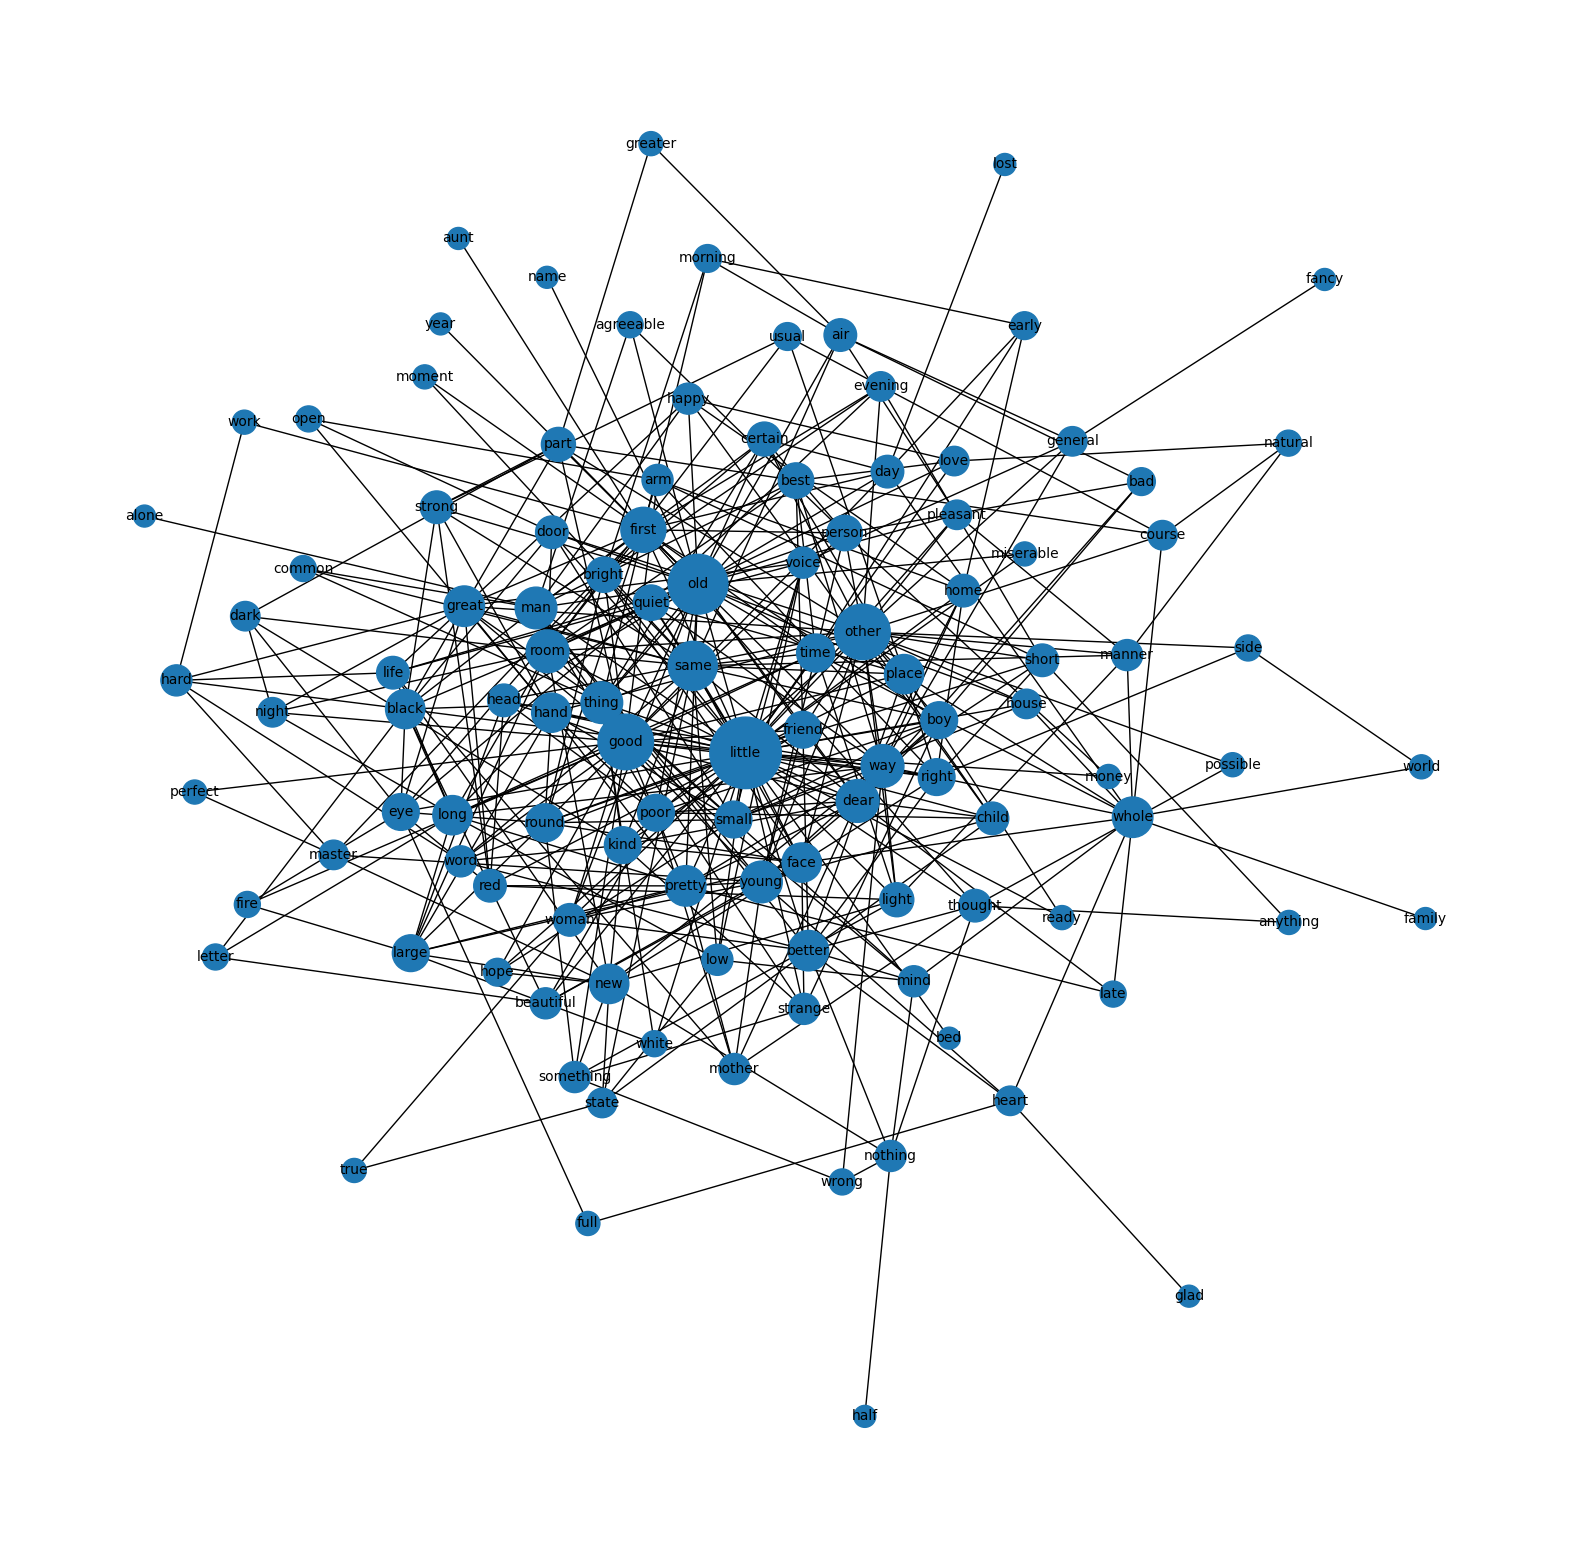

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
#pos = nx.layo
# degree - stopien wierzcholka czyli ilsoc krawedzi
node_sizes = [(G.degree(n))*50 + 200 for n in G.nodes()]
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'), ax=ax, pos = pos, node_size=node_sizes, font_size=10)

In [10]:
node = G.nodes[1]
node['label']

'man'

In [11]:
# najpopularniejsze slowa
# nx.degree(G) - zwraca liste tupli (node, degree)
def get_n_words(G: nx.Graph, n: int) -> list:
  degrees = nx.degree(G)
  # bierze kazzdy element z listy i sortuje po drugim elemencie i odwraca
  degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
  # degree[0] - index wierzcholka, degree[1] - stopien wierzcholka
  degrees = [(G.nodes[degree[0]]['label'],degree[1]) for degree in degrees]
  return degrees[:n] # [0:n] == [:n]
get_n_words(G,5)

[('little', 49), ('old', 33), ('other', 28), ('good', 28), ('same', 21)]

### Czego mozna potencjalnie sie dowiedziec ze stworzonej siec i jakich narzedzi sieci zlozonych uzyc (kilka,kilkanaście)
### klika,najkrotsza  sciezka, triada, modul itd - czego by ta miara dostaczyla
    Stopien wierzcholka
    klika
    liczba modułów
    najkrotsza sciezka
    najdluzsza sciezka
    motywy
    gestosc
    
    analiza k-rdzenii (kluczowe slowa w tej literaturze) !
    kliki !
    srednica (ktore slowa maja ze soba najmniej wspolnego) !
    metoda symulacyjna dodac jakies slowa i sprawdzic jak siec sie zmienila
    

In [12]:
nx.diameter(G) #jak zroznicowanie jest uzycie slow

5

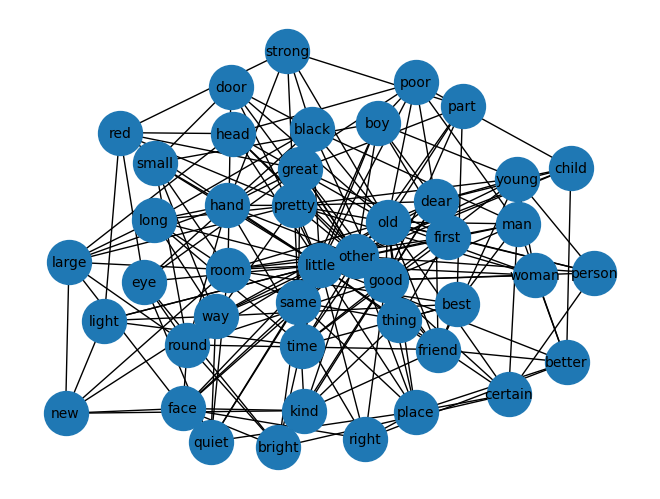

In [13]:
# analiza k-rdzeni
k_cores = nx.k_core(G,k=6)
nx.draw(k_cores, with_labels=True, labels=nx.get_node_attributes(k_cores, 'label'), node_size=1000, font_size=10)
# to jest siec najsilniej usieciowionych slow


In [14]:
# kliki
clicks = nx.find_cliques(G)
clicks = list(clicks)
# klika z 2 eleemntami nie jest interesujaca
clicks = [sorted(click) for click in clicks if len(click) > 2]
clicks = [click for click in clicks if len(click) == max([len(click) for click in clicks])]
clicks
# plot clicks
print(f'kazde z tych slow wystepowalo ze soba bezposrednio polaczone:')
for click in clicks:
    names = [G.nodes[node]['label'] for node in click]
    print(f'klika: {names}')

kazde z tych slow wystepowalo ze soba bezposrednio polaczone:
klika: ['old', 'little', 'woman', 'good', 'pretty']
klika: ['old', 'little', 'friend', 'dear', 'good']
klika: ['old', 'little', 'dear', 'good', 'pretty']


In [15]:

NEW_WORDS = {'any': ['person','bed', 'house', 'low', 'money', 'ready', 'small', 'strange', 'thought', 'lost'],
            'big': ['house', 'miserable', 'natural', 'half', 'wrong', 'name', 'pleasant', 'possible', 'side', 'perfect', 'poor', 'quiet', 'same', 'strong', 'something'],
            'badly': ['person', 'think'],
            'awsome': ['person', 'think'],
            'more': ['person', 'think'],
            'less': ['person', 'think']}
words_in_net = [G.nodes[node]['label'] for node in G.nodes()]
NEW_G = G.copy()
for word in NEW_WORDS:
    if word not in words_in_net:
        NEW_G.add_node(len(NEW_G.nodes())+1, label=word)
        for new_word in NEW_WORDS[word]:
            if new_word in words_in_net:
                NEW_G.add_edge(len(NEW_G.nodes()), nodes_list.index(new_word)+1)
            print(f'added edge {word} -> {new_word}')

added edge any -> person
added edge any -> bed
added edge any -> house
added edge any -> low
added edge any -> money
added edge any -> ready
added edge any -> small
added edge any -> strange
added edge any -> thought
added edge any -> lost
added edge big -> house
added edge big -> miserable
added edge big -> natural
added edge big -> half
added edge big -> wrong
added edge big -> name
added edge big -> pleasant
added edge big -> possible
added edge big -> side
added edge big -> perfect
added edge big -> poor
added edge big -> quiet
added edge big -> same
added edge big -> strong
added edge big -> something
added edge badly -> person
added edge badly -> think
added edge awsome -> person
added edge awsome -> think
added edge more -> person
added edge more -> think
added edge less -> person
added edge less -> think


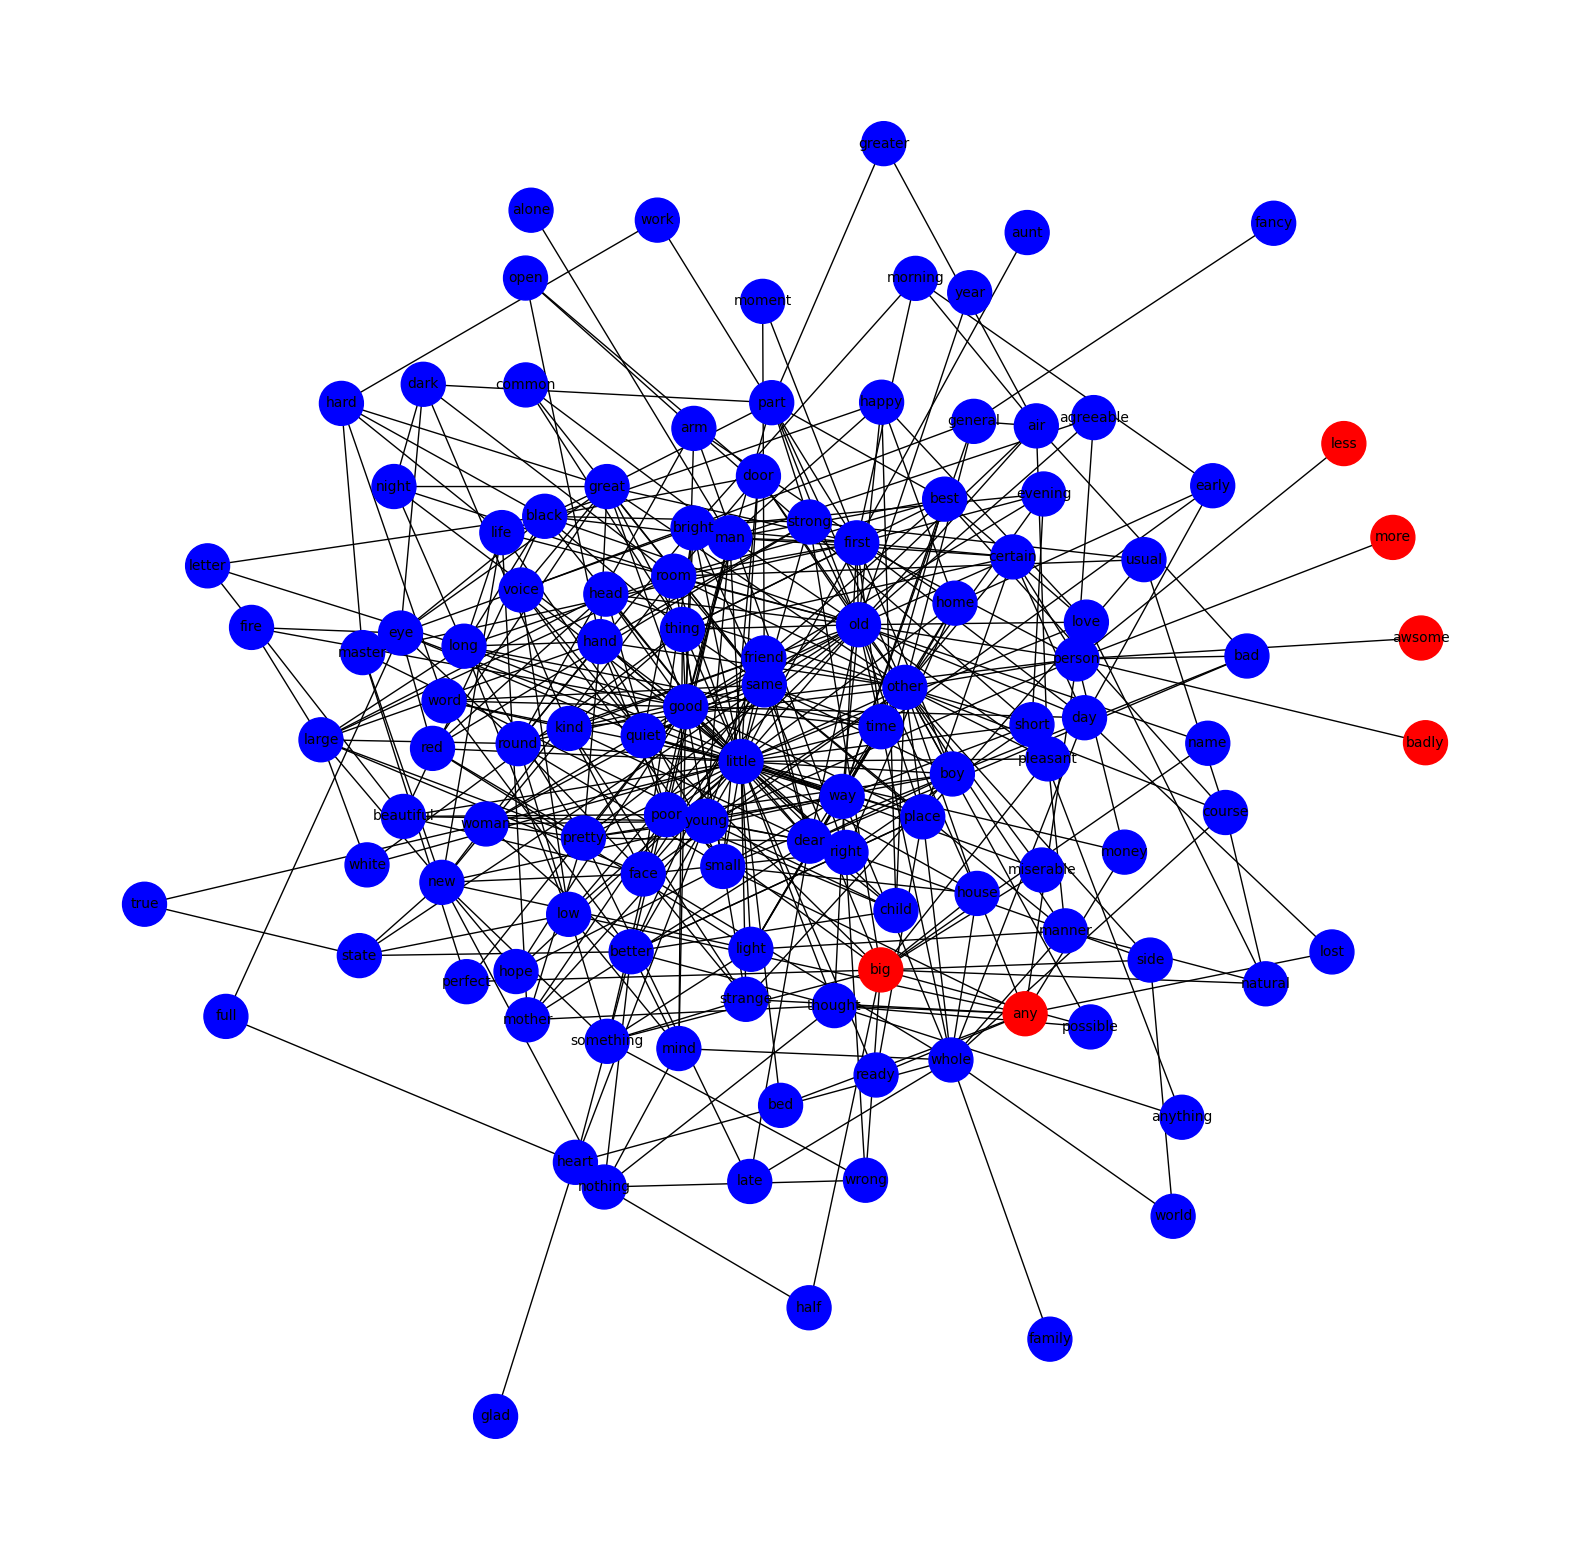

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.kamada_kawai_layout(NEW_G)
#pos = nx.layo
new = NEW_WORDS.keys()
color = ['red' if  NEW_G.nodes[node]['label'] in new else 'blue' for node in NEW_G.nodes()]
nx.draw(NEW_G, with_labels=True, labels=nx.get_node_attributes(NEW_G, 'label'), ax=ax, pos = pos, node_size=1000, font_size=10, node_color=color)


In [22]:
NEW_G.remove_node(1)
NEW_G.remove_nodes_from(edges)

AttributeError: module 'networkx.classes.graph' has no attribute 'remove'